In [6]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Load DataSet

data = pd.read_csv('D:\Python\datasets\Traffic Accident Severity Predictor Dataset.csv')
data.head(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1


In [ ]:
# Data Understanding and EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               19958 non-null  object 
 1   Road_Type             19958 non-null  object 
 2   Time_of_Day           19958 non-null  object 
 3   Traffic_Density       19958 non-null  float64
 4   Speed_Limit           19958 non-null  float64
 5   Number_of_Vehicles    19958 non-null  float64
 6   Driver_Alcohol        19958 non-null  float64
 7   Accident_Severity     19958 non-null  object 
 8   Road_Condition        19958 non-null  object 
 9   Vehicle_Type          19958 non-null  object 
 10  Driver_Age            19958 non-null  float64
 11  Driver_Experience     19958 non-null  float64
 12  Road_Light_Condition  19958 non-null  object 
 13  Accident              20000 non-null  int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 2.1+ MB


In [9]:
data.shape

(20000, 14)

In [10]:
data.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,19958.000000,19958.000000,19958.000000,19958.000000,19958.000000,19958.000000,20000.000000
mean,1.010923,71.448943,3.282694,0.164445,43.146758,38.859154,0.292000
std,0.783966,32.366260,1.999111,0.370688,15.099349,15.249536,0.454694
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.000000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


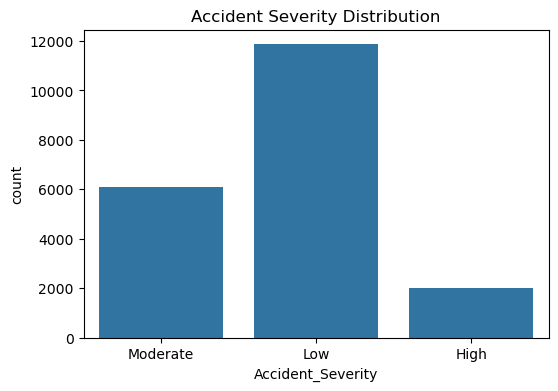

In [11]:
# Target Disstribution

plt.figure(figsize=(6,4))
sns.countplot(x='Accident_Severity',data=data)
plt.title('Accident Severity Distribution')
plt.show()

In [12]:
# Missing Value identification

print(data.isnull().sum())

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                 0
dtype: int64


In [13]:
data.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

In [14]:
# Fill missing values --

num_cols = data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    data.fillna({col: data[col].median()}, inplace=True)

In [15]:
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data.fillna({col:data[col].mode()[0]},inplace=True)

In [16]:
print(data.isnull().sum())

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64


In [17]:
data.head(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,Low,Wet,Car,51.0,48.0,Artificial Light,0
1,Clear,Rural Road,Night,1.0,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1


In [18]:
# Conversion of categorical data into numeric 

le= LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               20000 non-null  int64  
 1   Road_Type             20000 non-null  int64  
 2   Time_of_Day           20000 non-null  int64  
 3   Traffic_Density       20000 non-null  float64
 4   Speed_Limit           20000 non-null  float64
 5   Number_of_Vehicles    20000 non-null  float64
 6   Driver_Alcohol        20000 non-null  float64
 7   Accident_Severity     20000 non-null  int64  
 8   Road_Condition        20000 non-null  int64  
 9   Vehicle_Type          20000 non-null  int64  
 10  Driver_Age            20000 non-null  float64
 11  Driver_Experience     20000 non-null  float64
 12  Road_Light_Condition  20000 non-null  int64  
 13  Accident              20000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.1 MB


In [31]:
# Feature Engineering --
# We are taking the speed limit feature and converting it into a category by speed. It is essential for analysis for speed limit is a cause for an accident.

if 'Speed_Limit' in data.columns:
    data['Speed_Category'] = data['Speed_Category'].astype(int)
data.head(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident,Speed_Category
0,2,0,2,1.0,100.0,5.0,0.0,1,3,1,51.0,48.0,0,0,2
1,0,3,3,1.0,120.0,3.0,0.0,2,3,3,49.0,43.0,0,0,2
2,2,1,1,1.0,60.0,4.0,0.0,1,1,1,54.0,52.0,0,0,1
3,0,0,0,2.0,60.0,3.0,0.0,1,2,0,34.0,31.0,1,0,1
4,2,1,2,1.0,195.0,11.0,0.0,1,0,1,62.0,55.0,0,1,2


In [32]:
data.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident', 'Speed_Category'],
      dtype='object')

In [33]:
# Separation of features and target feature

x= data.drop('Accident_Severity', axis =1)
y= data['Accident_Severity']

In [34]:
x.shape

(20000, 14)

In [35]:
y.shape

(20000,)

In [36]:
x.columns

Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Road_Condition',
       'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident', 'Speed_Category'],
      dtype='object')

In [37]:
y

0        1
1        2
2        1
3        1
4        1
        ..
19995    2
19996    2
19997    2
19998    1
19999    1
Name: Accident_Severity, Length: 20000, dtype: int64

In [38]:
# Train and Test split the data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=40, stratify=y)

In [46]:
# Handle the imbalance Classes

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state =40)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [47]:
# Use XGBoost classifier to train the model

from xgboost import XGBClassifier

xgb = XGBClassifier( n_estimators = 300, learning_rate = 0.05, max_depth= 6, subsample = 0.8, cosample_bytree = 0.8, 
                     random_state =40, eval_matric = 'mlogloss')

xgb.fit(x_train_res, y_train_res)

C:\Users\vipul.patil\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:39:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "cosample_bytree", "eval_matric" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, cosample_bytree=0.8, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_matric='mlogloss', eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300, ...)

In [50]:
# Model Prediction

y_pred =xgb.predict(x_test)

In [51]:
# Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))

[[   2  380   19]
 [   4 2247  130]
 [   2 1155   61]]
              precision    recall  f1-score   support

           0       0.25      0.00      0.01       401
           1       0.59      0.94      0.73      2381
           2       0.29      0.05      0.09      1218

    accuracy                           0.58      4000
   macro avg       0.38      0.33      0.27      4000
weighted avg       0.47      0.58      0.46      4000

Accuracy: 0.5775
Balanced Accuracy: 0.3329302528519327
Macro F1 Score: 0.2748014847182507


In [52]:
# Feature Importance in XGBoost

import pandas as pd

feat_imp = pd.DataFrame({
    "Feature": x.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feat_imp)


                 Feature  Importance
3        Traffic_Density    0.271200
5     Number_of_Vehicles    0.144954
6         Driver_Alcohol    0.128882
12              Accident    0.082894
11  Road_Light_Condition    0.056539
1              Road_Type    0.041436
9             Driver_Age    0.040667
10     Driver_Experience    0.040409
7         Road_Condition    0.039368
4            Speed_Limit    0.039033
8           Vehicle_Type    0.038866
0                Weather    0.038249
2            Time_of_Day    0.037504
13        Speed_Category    0.000000


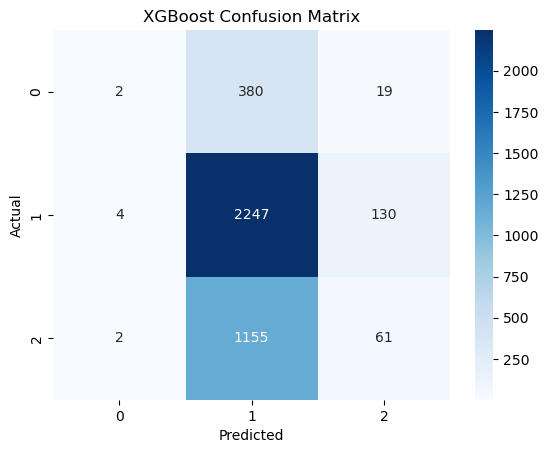

In [53]:
# Confusion Matrix Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


In [ ]:
 Conclusion= 

From Confusion Matrix -
1. The model rarely predicts Low severity correctly.
2. The model is very good at predicting moderate-severity accidents.
3. Model fails badly for high-severity accidents.

From Classification report --
1. When the model predicts Low severity, only 25% are correct. So its Bad.
2. When the model predicts moderate-severity, 59% are correct. It is good.
3. When the model predicts high-severity, only 29% are correct. It is again Bad.
4. Recall is perfect for moderate-severity, 94%, but it's bad for Low and moderate severity. 
5. For F1 Score, F1 score is good for moderate-severity, 73%, but it's bad for Low and moderate severity.

By accuaracy its 57.75  58%, but it is misleading due to an imbalanced dataset.
Balance accuracy is very poor, 33%.
By F1v score - overall model performance is very poor.